In [1]:
TTS_PATH = "/home/iref/PycharmProjects/tts-vc/"

In [2]:
import os
import sys
sys.path.append(TTS_PATH) # set this if TTS is not installed globally
import glob
import librosa
import numpy as np
import pandas as pd
from scipy.stats import norm
from tqdm import tqdm_notebook as tqdm
from multiprocessing import Pool
from matplotlib import pylab as plt
from collections import Counter
from mozilla_TTS_utils.preprocess import *
%matplotlib inline

In [3]:
DATA_PATH = "/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/"
# META_DATA = ["kleinzaches/metadata.csv",
#             "spiegel_kaetzchen/metadata.csv",
#             "herrnarnesschatz/metadata.csv",
#             "maedchen_von_moorhof/metadata.csv",
#             "koenigsgaukler/metadata.csv",
#             "altehous/metadata.csv",
#             "odysseus/metadata.csv",
#             "undine/metadata.csv",
#             "reise_tilsit/metadata.csv",
#             "schmied_seines_glueckes/metadata.csv",
#             "kammmacher/metadata.csv",
#             "unterm_birnbaum/metadata.csv",
#             "liebesbriefe/metadata.csv",
#             "sandmann/metadata.csv"]
NUM_PROC = 4

In [4]:
# use your own preprocessor at this stage - TTS/datasets/proprocess.py
items = russian_tts(DATA_PATH)
print(" > Number of audio files: {}".format(len(items)))

/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/Andrienko_A/Andrienko_A_1.wav
/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/Andrienko_A/Andrienko_A_2.wav
/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/Andrienko_A/Andrienko_A_3.wav
/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/Andrienko_A/Andrienko_A_4.wav
/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/Andrienko_A/Andrienko_A_5.wav
/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/Andrienko_A/Andrienko_A_6.wav
/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/Andrienko_A/Andrienko_A_7.wav
/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/Andrienko_A/Andrienko_A_8.wav
/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/Andrienko_A/Andrienko_A_9.wav
/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/Andrienko_A/Andrienko_A_10.wav
/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/Andrienko_A/Andrienko_A_11.wav
/home/ir

/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/Vitorgan_E/Vitorgan_E-01.wav
/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/Vitorgan_E/Vitorgan_E-02.wav
/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/Vitorgan_E/Vitorgan_E-03.wav
/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/Vitorgan_E/Vitorgan_E-04.wav
/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/Vitorgan_E/Vitorgan_E-05.wav
/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/Vitorgan_E/Vitorgan_E-06.wav
/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/Vitorgan_E/Vitorgan_E-07.wav
/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/Vitorgan_E/Vitorgan_E-08.wav
/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/Vitorgan_E/Vitorgan_E-09.wav
/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/Vitorgan_E/Vitorgan_E-10.wav
/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/Vitorgan_E/Vitorgan_E-11.wav
/home/iref/PycharmPro

/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/sun/sun_ru_0001.wav
/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/sun/sun_ru_0003.wav
/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/sun/sun_ru_0004.wav
/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/sun/sun_ru_0005.wav
/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/sun/sun_ru_0006.wav
/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/sun/sun_ru_0007.wav
/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/sun/sun_ru_0008.wav
/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/sun/sun_ru_0009.wav
/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/sun/sun_ru_0010.wav
/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/sun/sun_ru_0011.wav
/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/sun/sun_ru_0013.wav
/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/sun/sun_ru_0014.wav
/home/iref/PycharmProjects/tts-vc/data/s

/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/Vihrov_V/Vihrov_V-01.wav
/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/Vihrov_V/Vihrov_V-02.wav
/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/Vihrov_V/Vihrov_V-03.wav
/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/Vihrov_V/Vihrov_V-04.wav
/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/Vihrov_V/Vihrov_V-05.wav
/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/Vihrov_V/Vihrov_V-06.wav
/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/Vihrov_V/Vihrov_V-07.wav
/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/Vihrov_V/Vihrov_V-08.wav
/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/Vihrov_V/Vihrov_V-09.wav
/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/Vihrov_V/Vihrov_V-10.wav
/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/Vihrov_V/Vihrov_V-11.wav
/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/Vihro

/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/Pinsker_M/Pinsker_M-01.wav
/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/Pinsker_M/Pinsker_M-02.wav
/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/Pinsker_M/Pinsker_M-03.wav
/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/Pinsker_M/Pinsker_M-04.wav
/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/Pinsker_M/Pinsker_M-05.wav
/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/Pinsker_M/Pinsker_M-06.wav
/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/Pinsker_M/Pinsker_M-07.wav
/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/Pinsker_M/Pinsker_M-08.wav
/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/Pinsker_M/Pinsker_M-09.wav
/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/Pinsker_M/Pinsker_M-10.wav
/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/Pinsker_M/Pinsker_M-11.wav
/home/iref/PycharmProjects/tts-vc/data/spea

In [5]:
# check wavs if exist
wav_files = []
for item in items:
    wav_file = item[1].strip()
    wav_files.append(wav_file)
    if not os.path.exists(wav_file):
        print(waf_path)

In [6]:
# show duplicate items
c = Counter(wav_files)
print([item for item, count in c.items() if count > 1])

[]


In [7]:
def load_item(item):
    file_name = item[1].strip()
    text = item[0].strip()
    audio = librosa.load(file_name, sr=None)
    sr = audio[1]
    audio = audio[0]
    audio_len = len(audio) / sr
    text_len = len(text)
    return file_name, text, text_len, audio, audio_len

# This will take a while depending on size of dataset
if NUM_PROC == 1:
    data = []
    for m in tqdm(items):
        data += [load_item(m)]
else:
    with Pool(NUM_PROC) as p:
        data = list(tqdm(p.imap(load_item, items), total=len(items)))

100%|██████████| 25282/25282 [01:28<00:00, 286.41it/s]


In [8]:
# count words in the dataset
w_count = Counter()
for item in tqdm(data):
    text = item[1].lower().strip()
    for word in text.split():
        w_count[word] += 1
print(" > Number of words: {}".format(len(w_count)))

100%|██████████| 25282/25282 [00:00<00:00, 44571.29it/s]

 > Number of words: 40312


In [9]:
text_vs_durs = {}  # text length vs audio duration
text_len_counter = Counter()  # number of sentences with the keyed length
for item in tqdm(data):
    text = item[1].lower().strip()
    text_len = len(text)
    text_len_counter[text_len] += 1
    audio_len = item[-1]
    try:
        text_vs_durs[text_len] += [audio_len]
    except:
        text_vs_durs[text_len] = [audio_len]

100%|██████████| 25282/25282 [00:00<00:00, 361944.72it/s]


In [10]:
# text_len vs avg_audio_len, median_audio_len, std_audio_len
text_vs_avg = {}
text_vs_median = {}
text_vs_std = {}
for key, durs in text_vs_durs.items():
    text_vs_avg[key] = np.mean(durs)
    text_vs_median[key] = np.median(durs)
    text_vs_std[key] = np.std(durs)

In [23]:
text_vs_avg

{29: 2.928082089552239,
 40: 3.6143686777456647,
 138: 9.444999999999999,
 81: 5.847986623616236,
 77: 5.760350341796874,
 92: 6.605653111353711,
 72: 5.556178758741258,
 71: 5.506993217054263,
 52: 4.2863131147540985,
 59: 4.745408941947566,
 44: 3.842187703583062,
 55: 4.451863477653632,
 50: 4.1664903052805276,
 43: 3.7664855285234897,
 39: 3.5672184959349593,
 51: 4.262364547038327,
 74: 5.591097886029411,
 73: 5.51323927919708,
 67: 5.196199018771332,
 191: 16.44,
 32: 3.19996835443038,
 100: 6.923400152439025,
 41: 3.635493055555555,
 25: 2.7062882965686277,
 42: 3.7502553088803086,
 175: 15.580531249999998,
 28: 2.8011556969026548,
 78: 5.903923479087452,
 54: 4.406549999999999,
 60: 4.906769675925926,
 53: 4.36745783898305,
 84: 6.107402671755725,
 99: 6.974927556818182,
 48: 4.114796266233767,
 90: 6.534850725446428,
 63: 5.0057545849420855,
 70: 5.360001493174061,
 76: 5.58925855513308,
 66: 5.061870036101083,
 24: 2.6840417713567843,
 56: 4.523439912280701,
 37: 3.4352208333

### Avg audio length per char

In [11]:
for item in data:
    if item[-1] < 2:
        print(item)

('/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/Borisov_O/Borisov_O1-01.wav', 'я очень люблю', 13, array([1.5258789e-04, 1.5258789e-04, 9.1552734e-05, ..., 9.1552734e-05,
       4.5776367e-04, 4.5776367e-04], dtype=float32), 1.47)
('/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/Borisov_O/Borisov_O2-01.wav', 'я иногда', 8, array([-2.7465820e-04, -2.4414062e-04, -3.0517578e-04, ...,
        3.3569336e-04,  3.9672852e-04,  3.0517578e-05], dtype=float32), 1.06)
('/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/Borisov_O/Borisov_O2-06.wav', 'и грушами', 9, array([ 9.1552734e-05,  1.2207031e-04, -1.8310547e-04, ...,
       -1.9531250e-03, -1.6479492e-03, -1.2512207e-03], dtype=float32), 0.94)
('/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/Borisov_O/Borisov_O3-02.wav', 'так тиха', 8, array([6.1035156e-05, 9.1552734e-05, 3.0517578e-05, ..., 7.3242188e-04,
       4.8828125e-04, 4.2724609e-04], dtype=float32), 0.96)
('/home/iref/PycharmProje

        1.9226074e-03, -3.0517578e-05,  1.5258789e-04], dtype=float32), 1.918625)
('/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/len/len_ru_0392.wav', 'ведь я тебе твердо сказал', 25, array([ 0.0012207 , -0.00192261, -0.00112915, ..., -0.00021362,
       -0.00030518, -0.00021362], dtype=float32), 1.52275)
('/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/len/len_ru_0393.wav', 'слишком поздно или слишком рано', 31, array([-0.0015564 , -0.00018311, -0.00082397, ...,  0.00015259,
        0.00030518,  0.00027466], dtype=float32), 1.8780625)
('/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/len/len_ru_0398.wav', 'что вы о ней думаете', 20, array([ 0.00170898,  0.00134277,  0.00097656, ..., -0.00012207,
       -0.00024414,  0.00039673], dtype=float32), 1.3603125)
('/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/Kononov_Mikhail/Kononov_Mikhail-02.wav', 'но погодите', 11, array([ 9.1552734e-05,  6.1035156e-05,  9.1552734e-05, ...,
        1.2

In [13]:
sec_per_chars = []
for item in data:
    text = item[1]
    dur = item[-1]
    sec_per_char = dur / len(text)
    sec_per_chars.append(sec_per_char)
sec_per_char /= len(data)
print(sec_per_char)

7.585930701684995e-06


In [14]:
mean = np.mean(sec_per_chars)
std = np.std(sec_per_chars)
print(mean)
print(std)

0.08377266392901057
0.025015910058918078


In [15]:
dist = norm(mean, std)

# find irregular instances long or short voice durations
for item in data:
    text = item[1]
    dur = item[-1]
    sec_per_char = dur / len(text)
    pdf =norm.pdf(sec_per_char)
    if pdf < 0.39:
        print(item)

('/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/Andrienko_A/Andrienko_A_1.wav', 'дэн браун. цифровая крепость.', 29, array([ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
        9.1552734e-05, -6.1035156e-05,  6.1035156e-05], dtype=float32), 6.4674375)
('/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/vsh/vsh_ru_0014.wav', 'хм', 2, array([-9.1552734e-05, -2.7465820e-04, -3.6621094e-04, ...,
        1.6174316e-03,  1.1901855e-03,  1.3122559e-03], dtype=float32), 1.025)
('/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/vsh/vsh_ru_0035.wav', 'океан', 5, array([ 8.8195801e-03,  7.8430176e-03,  6.5307617e-03, ...,
       -3.0517578e-05, -1.5258789e-03, -1.4343262e-03], dtype=float32), 1.275)
('/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/vsh/vsh_ru_0046.wav', 'окном', 5, array([ 0.00073242,  0.00085449,  0.00067139, ...,  0.00039673,
        0.00125122, -0.00048828], dtype=float32), 1.2125)
('/home/iref/PycharmProjects/tts-vc/data/

('/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/user6/common_voice_ru_18849400.wav', 'Не знал.,,,,,,,', 15, array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 3.384)
('/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/user30/common_voice_ru_18866251.wav', 'Дура!', 5, array([ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
        3.0517578e-05, -9.1552734e-05,  1.5258789e-04], dtype=float32), 1.584)
('/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/user5/common_voice_ru_18877251.wav', 'У тебя что?', 11, array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 2.688)
('/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/user5/common_voice_ru_18877342.wav', 'Я пошутила.', 11, array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 2.472)
('/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/user5/common_voice_ru_18878473.wav', 'Еще и еще ктото.', 16, array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 3.576)
('/home/iref/PycharmProjects

       -0.00024414, -0.00024414], dtype=float32), 2.664)
('/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/user1/common_voice_ru_18912288.wav', 'Нет!,,,,,,', 10, array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 2.544)
('/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/user1/common_voice_ru_18913124.wav', 'Нет?,,,,,,', 10, array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 2.496)
('/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/user1/common_voice_ru_18913148.wav', 'Да!,,,,,,', 9, array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
       3.0517578e-05, 0.0000000e+00], dtype=float32), 2.424)
('/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/user1/common_voice_ru_18913376.wav', 'Да.,,,,,,', 9, array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 2.256)
('/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/user1/common_voice_ru_18928967.wav', 'Ну?,,,,,,', 9, array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

### Plot Dataset Statistics

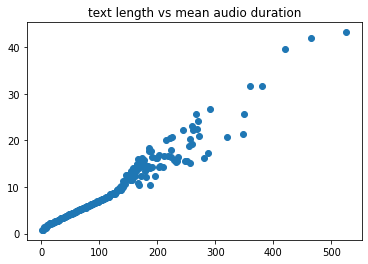

In [16]:
plt.title("text length vs mean audio duration")
plt.scatter(list(text_vs_avg.keys()), list(text_vs_avg.values()))

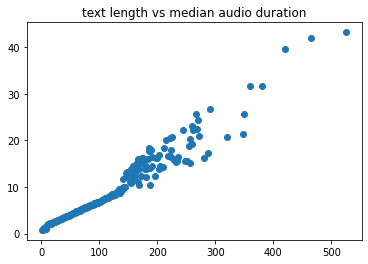

In [17]:
plt.title("text length vs median audio duration")
plt.scatter(list(text_vs_median.keys()), list(text_vs_median.values()))

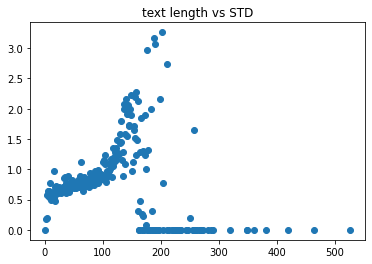

In [18]:
plt.title("text length vs STD")
plt.scatter(list(text_vs_std.keys()), list(text_vs_std.values()))

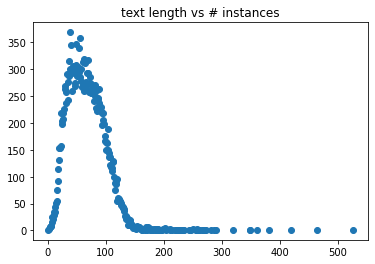

In [19]:
plt.title("text length vs # instances")
plt.scatter(list(text_len_counter.keys()), list(text_len_counter.values()))

### Check words frequencies

In [20]:
w_count_df = pd.DataFrame.from_dict(w_count, orient='index')
w_count_df.sort_values(0, ascending=False, inplace=True)

In [21]:
w_count_df

,0
и,7160
в,6358
не,3444
на,3284
я,2752
...,...
планеткой,1
поравнявшись,1
красиво.,1
"полезно,",1


In [ ]:
# check a certain word
w_count_df.at['minute', 0]

<AxesSubplot:>

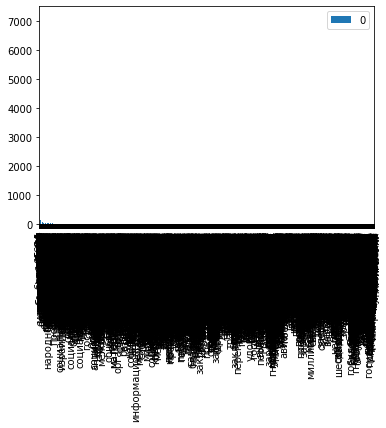

In [22]:
# fequency bar plot - it takes time!!
w_count_df.plot.bar()